In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

![imagen.png](images/sumatorio.png)
![imagen.png](images/funcion.png)
![imagen.png](images/sigmoide.png)
![imagen.png](images/sumatorio_errores.png)
![imagen.png](images/neurona.png)

In [2]:
# Variables globales
# z = Salida sumatorio
# y_hat = sigmoide de z
b = 4
w1 = 2
w2 = 3
# w_mn =[[w1], [w2]. [b]]



In [3]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# porque patata
def sigmoide_derivada_respecto_z(z):
    return sigmoide(z)*(1-sigmoide(z))

# Salida z (funcion.png para este caso en especifio no es general)
def salida_sumatorio(x):
    # x1 = x[:, [0]]; x2 = x[:, [1]]; return w1 * x1 + w2 * x2 + b
    return b + w1 * x[:, [0]] + w2 * x[:, [1]]

def salida_sumatorio(x):
    array_unos = np.ones((len(x), 1))
    x_nueva = np.append(x, array_unos, 1)
    # x_nueva = np.hstack((x, array_unos))
    ret = np.dot(x_nueva, w) # x @ w
    return ret

def sigmoide_activacion(x):
    z = salida_sumatorio(x)
    y_hat = sigmoide(z)
    return y_hat

# error = y_hat -y
def error(x, y):
    y_hat = sigmoide_activacion(x)
    err = y_hat - y
    return err

# coste = 1/2 * (Σ(y_hat - y)^2)/ num of Σ(y_hat - y)^2 (mean)
# sumatorio errores, le hacemos la media para que me devuelva un valor simple
def coste (x, y):
    # err = error(x,y); err = err**2; err = err/2; c = err.mean()
    c = 1/2 * (error(x, y)**2).mean()
    return c

# d(coste)/d(y_hat) = Σ(y_hat - y)
def derivada_coste_respecto_y_hat(x, y):
    # err = error(x,y); return err
    return error(x, y)

# derivda de y_hat respecto a z
def derivada_y_hat_respecto_salida_sumatorio(x):
    z = salida_sumatorio(x)
    d = sigmoide_derivada_respecto_z(z)
    return d

def derivada_z_respecto_w1(x):
    x1 = x[:, [0]]
    return x1    
    
# z = w2 * x2 + ....0
# dw2 = 1
# dz = dw2*x2
# dz = x2 
def derivada_z_respecto_w2(x):
    x2 = x[:, [1]]
    return x2

def derivada_z_respecto_bias():
    return 1

def derivada_sumatorio_respecto_w(x):
    array_unos = np.ones((len(x), 1))
    x_nueva = np.append(x, array_unos, 1)
    return x_nueva

def predice(x):
    y_hat = sigmoide_activacion(x)
    return y_hat

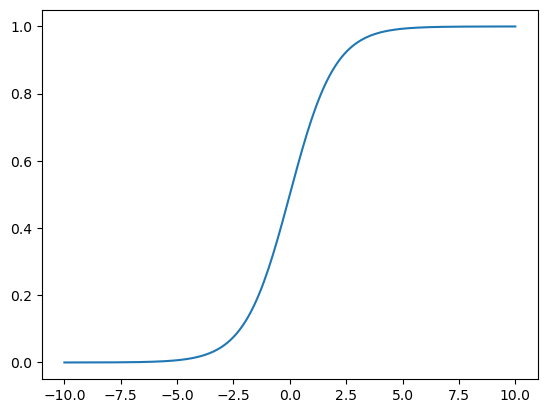

In [4]:
xs = np.linspace(-10, 10, 200)
ys = sigmoide(xs)
plt.plot(xs, ys)

In [5]:
def calcular_media(x, lr, dc, dy, dx):
        return x - (lr*dc*dy*dx).mean()

def fit(x, y, epochs = 100, lr = 0.01):
    # global w1, w2, b
    global w
    lloss = []
    for _ in range(epochs):
        dc = derivada_coste_respecto_y_hat(x, y)
        dy = derivada_y_hat_respecto_salida_sumatorio(x)
        # dw1 = derivada_z_respecto_w1(x)
        # dw2 = derivada_z_respecto_w2(x)
        # db = derivada_z_respecto_bias()
        dw = derivada_sumatorio_respecto_w(x)

        # w1 = calcular_media(w1, lr, dc, dy, dw1)
        # w2 = calcular_media(w1, lr, dc, dy, dw2)
        # b = calcular_media(b, lr, dc, dy, db)

        d1 = dy * dc
        d2 = d1 * dw
        dt = d2.T
        dmedia = dt.mean(axis=1, keepdims=True)
        w = w - lr*dmedia

        # w1 = w1 - (lr*dc*dy*dw1).mean()
        # w2 = w2 - (lr*dc*dy*dw2).mean()
        # b = b - (lr*dc*dy*db).mean()

        loss = coste(x, y)
        # print(f"loss: {loss} w1: {w1} w2: {w2} b: {b}")
        lloss.append(loss)
    return lloss

In [6]:
# dataset or
dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
# dataset and
#dt = [[0, 0, 0],[0, 1, 0],[1, 0, 0],[1, 1, 1]]
# dataset xor
#dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,0]]

dt = np.array(dt)
print(dt)
x = dt[:, [0, 1]]
y = dt[:, [2]]
print(x)
print(y)

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [1]]


loss: 0.03355243088106464 w: [[ 1.63531525]
 [ 1.63531525]
 [-0.32988622]]
[[0.41826831]
 [0.78674726]
 [0.78674726]
 [0.94982421]]


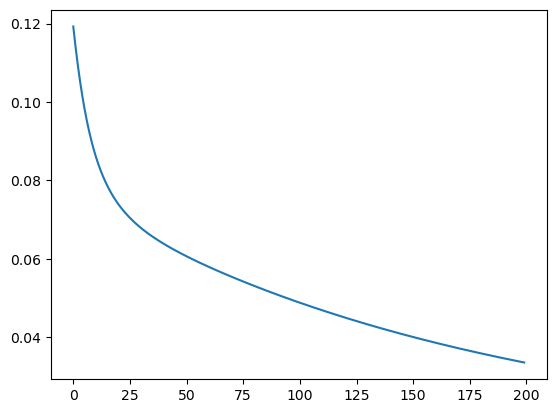

In [7]:
# w1 = 0; w2 = 0; b = 0
w = np.array([[0],[0],[0]])
lloss = fit(x, y, epochs = 200, lr=0.5)
# print(f"loss: {lloss[-1]} w1: {w1} w2: {w2} b: {b}")
print(f"loss: {lloss[-1]} w: {w}")
ret = predice(x)
print(ret)
plt.plot([i for i in range(len(lloss))], lloss)